# Creating and Plotting a Curve Fit

Let's start with the very basics: how do we create and plot a curve fit?

Make sure you have the numpy, scipy, lmfit, and matplotlib libraries installed before starting these tutorials.

In [1]:
#Imports
import numpy as np
import lmfit as lf
import matplotlib.pyplot as plt
import scipy.optimize as opt

### Setup

Let's set up a simple function *y = f(x) = x<sup>2</sup>*.

We'll set up some fake data for this function and fit it using non-linear least squares.</br>
This fit will be done using the same method, but in two different python libraries.</br>
At the end, we'll compare the function, the data, and the fits that we made.

In [2]:
#Setup - y = f(x) = x^2

#Fakedata
xdata = np.linspace(0,5,50)                 #Generate x-values
ydata = np.zeros(len(xdata))                #Create array to define later
noise = np.random.normal(0,1,len(xdata))    #Create nosie to add to y-values; otherwise our fits will be to unrealistic data
#np.random.noraml generates normally-distributed random numbers.
#The first number (0) tells it that the center of these random numbers should be 0.
#The second number (1) says that the error/width/standard deviation of that data should be 1.
#"len(xdata)" tells it to generate as many numbers as there are entries in xdata.
for i,n in enumerate(xdata):                #Redefine y-data to be:
    ydata[i] = n**2+noise[i]                #x^2 plus some noise.
sigdata = np.ones(len(xdata))               #Sigma is 1 since that's the width of the noise distribution

#Function
def f(x,a,b,c):          #Independent variable must be listed first for scipy to know how to fit it.
    return a*x**2+b*x+c  #In python, anything unset must be listed as a variable in the function, including the parameters we fit for.

#Points representing function - this is necessary to plot f(x) for our comparison.
ycurve = xdata**2 

Let's take a brief look at everything we've set up so far:

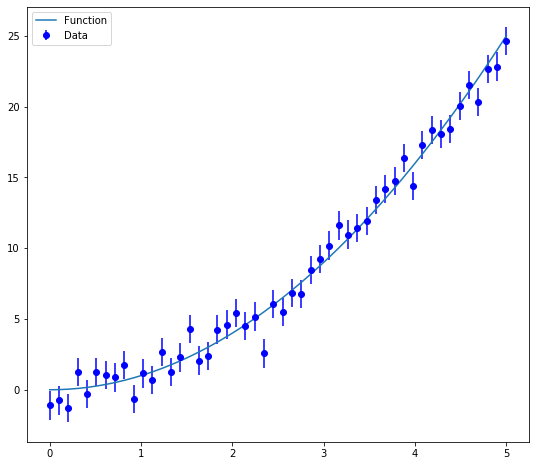

In [3]:
#Plotting

fig = plt.figure(figsize=(9.0,8.0))  #size of the plot -- helps make it more visible

plt.errorbar(xdata,ydata,yerr=sigdata,fmt='bo',label='Data') #Plot the fake data we generated.
#Plot them as points (fmt='*o'; the * corresponds to color) with error bars
plt.plot(xdata,ycurve,label='Function')                      #Plot the function we created.
#Accepting default style gives us a solid line

plt.legend()           #Tells our plot to show a legend
plt.show()             #Depending how your environment is set up, this line may not be necessary, but it won't break anything.

We see that our data points fall roughly along the curve we generated, but there is a level of randomness, which is exactly what we want.

### scipy.optimize

One of the big advantages of using SciPy is that it is fairly common -- people trying to fit data likely already have it installed, and it may even already be used in the code they're using for data analysis.

In [4]:
#Setup
#Initial Guesses for a,b,c. In this case, our initial guess is the true function.
p0 = [1,0,0] #Parameters should be in the same order here as they were when we defined our function.

#Do fit
s_fit = opt.curve_fit(f,xdata,ydata,p0,sigma=sigdata,absolute_sigma=True) #absolute_sigma is set so that uncertainties aren't treated as percentages.
#print(s_fit) #If we uncomment this line, we see that s_fit is an array containing two arrays.

#Define parameters from fit. Our parameters are stored in the first array in our fit output, in the order they were listed in f.
s_a = s_fit[0][0]
s_b = s_fit[0][1]
s_c = s_fit[0][2]

#Define error from fit.
s_cov = s_fit[1]                    #The second array in the fit output is a covariance matrix.
s_error = np.sqrt(np.diag(s_cov)) #The diagonals of the covariance matrix are the variances of individual parameters.
s_ae = s_error[0]                   #The errors will be in an order corresponding to the order of the parameters in their array
s_be = s_error[1]
s_ce = s_error[2]

#Create array to plot
s_curve = s_a*xdata**2+s_b*xdata+s_c

#Print Values
print('a: '+str(s_a)+u' \u00B1 '+str(s_ae))
print('b: '+str(s_b)+u' \u00B1 '+str(s_be))
print('c: '+str(s_c)+u' \u00B1 '+str(s_ce))

a: 0.8865390717730937 ± 0.07296220980404351
b: 0.5335163419803961 ± 0.3772408217733772
c: -0.3643033116307919 ± 0.4078416908625618


### lmfit

LmFit is much less common than SciPy because it is built for a much narrower focus; unlike SciPy, LmFit only does curve fitting.</br>
However, LmFit has some nice features that SciPy's optimize module does not.

In [5]:
#Setup
weighdata = 1/sigdata                       #We will need weights for lmfit. This tells us how much to account for a single data point in the fit.
l_mod = lf.Model(f)                         #Tell lmfit that we want to model the function f
params = l_mod.make_params(a=1, b=0, c=0)   #Give lmfit our initial guesses - again, the true function

#Do fit
l_fit = l_mod.fit(ydata, params, x=xdata, weights=weighdata) #Here is where the weights we set at the beginning come in.

#Define Stuff
l_dict = l_fit.best_values #l_fit has a lot of output. We want to use the final result.
l_a = l_dict['a']          #Dictionary items are called based on their name.
l_b = l_dict['b']          #So, we don't have to track the order of parameters.
l_c = l_dict['c']

#Create array to plot
l_curve = l_a*xdata**2+l_b*xdata+l_c

l_fit #Display information about the fit

While SciPy required a bit less setup, the output of LmFit is much nicer. I also find the code for using lmfit more readable.</br>
LmFit also contains a bit more information, such as &Chi;<sup>2</sup> values.

The parameter values and errors, though, are more or less the same.

### Plotting

Now it's time to plot everything together for comparison.

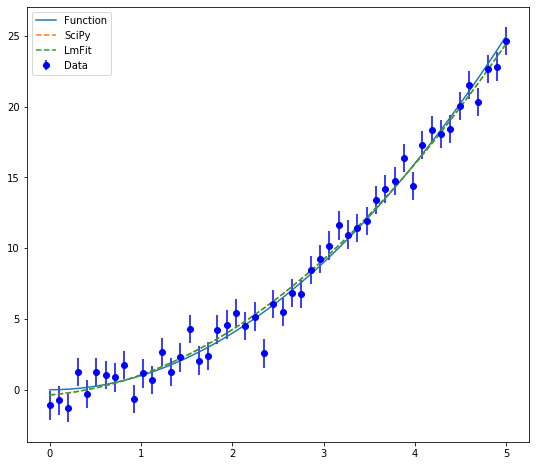

In [6]:
#Plotting

fig = plt.figure(figsize=(9.0,8.0))

plt.errorbar(xdata,ydata,yerr=sigdata,fmt='bo',label='Data')
plt.plot(xdata,ycurve,label='Function')
plt.plot(xdata,s_curve,linestyle='--',label='SciPy') #Plot the scipy curve fit with a dashed line
plt.plot(xdata,l_curve,linestyle='--',label='LmFit') #Plot the lmfit curve fit with a dashed line.
#Since the two lines have the same style, they will automatically have different colors.

plt.legend()
plt.show()

There's no visible difference between our two curve fits -- in fact, we can only see one of them. (If you want to see the other, comment out the one that's visible; they're right on top of each other).  So, which library you want to use will depend mostly on what kinds of inputs and outputs you want to use.

The next notebook will discuss different types of error and how they can affect our curve fitting.